In [1]:
import cv2

In [2]:
#### WebCam
cam = cv2.VideoCapture(0)
while True:
    ret,frame = cam.read()
    cv2.imshow("Webcam",frame)
    if cv2.waitKey(1)==13:
        break
cam.release()
cv2.destroyAllWindows()

#### ROI - Region Of Interest

In [20]:
import matplotlib.pyplot as plt
path = r'C:\Users\umang\Desktop\messy1.jpg'

In [21]:
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

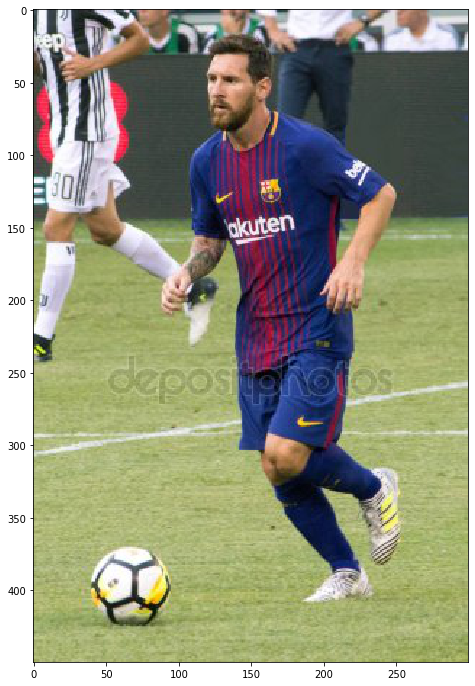

In [22]:
plt.figure(figsize=(8,12))
plt.imshow(img)
plt.show()

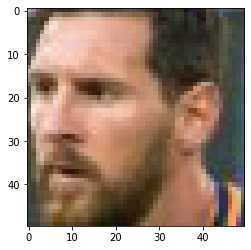

In [24]:
face = img[30:80,120:170]
plt.imshow(face)
plt.show()

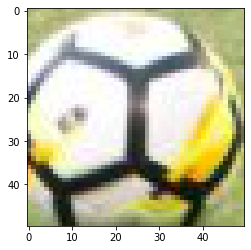

In [23]:
ball = img[370:420,45:95]
plt.imshow(ball)
plt.show()

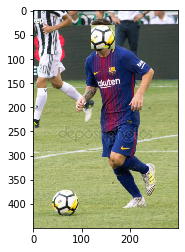

In [14]:
img[30:80,120:170] = ball
plt.imshow(img)
plt.show()

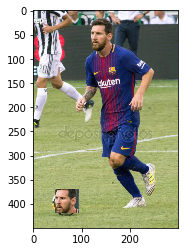

In [25]:
img[370:420,45:95] = face
plt.imshow(img)
plt.show()

### Face Detection

In [1]:
import cv2
xml = r'C:\Users\umang\Desktop\face.xml'  ## harcascade
path = r'C:\Users\umang\Desktop\faces.jpg'
img = cv2.imread(path)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [2]:
face_cascade = cv2.CascadeClassifier(xml)

In [3]:
faces = face_cascade.detectMultiScale(img,1.2,5)

In [4]:
faces

array([[305,   6,  79,  79],
       [447,  10,  83,  83],
       [ 30, 298,  94,  94],
       [ 37,   2,  74,  74],
       [440, 297,  99,  99],
       [164, 303,  88,  88],
       [ 34, 445,  89,  89],
       [292, 300, 102, 102],
       [ 36, 155,  82,  82],
       [166,   7,  86,  86],
       [297, 147,  88,  88],
       [445, 153,  87,  87],
       [157, 138,  99,  99],
       [162, 450,  93,  93],
       [445, 448,  86,  86],
       [300, 451,  82,  82]], dtype=int32)

In [5]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Face Detection (Live Webcam)

In [1]:
import cv2
xml = r'C:\Users\umang\Desktop\face.xml'  ## harcascade
face_cascade = cv2.CascadeClassifier(xml)
cam = cv2.VideoCapture(0)
while True:
    ret,frame=cam.read()
    faces = face_cascade.detectMultiScale(frame,1.2,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow("Faces In Webcam",frame)
    if cv2.waitKey(1)==13:
        break
cam.release()
cv2.destroyAllWindows()

In [4]:
import cv2
xml = r'C:\Users\umang\Desktop\face.xml'  ## harcascade
eye_xml = r'C:\Users\umang\Desktop\eye.xml' 
path = r'C:\Users\umang\Desktop\faces.jpg'
img = cv2.imread(path)
face_cascade = cv2.CascadeClassifier(xml)
eye_cascade = cv2.CascadeClassifier(eye_xml)
faces = face_cascade.detectMultiScale(img,1.2,5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    my_face = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(my_face)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(my_face,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
xml = r'C:\Users\umang\Desktop\face.xml'  ## harcascade
smile_xml = r'C:\Users\umang\Desktop\smile.xml' 
path = r'C:\Users\umang\Desktop\smiles.jpg'
img = cv2.imread(path)
face_cascade = cv2.CascadeClassifier(xml)
smile_cascade = cv2.CascadeClassifier(smile_xml)
faces = face_cascade.detectMultiScale(img,1.2,5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    my_face = img[y:y+h,x:x+w]
    smiles = smile_cascade.detectMultiScale(my_face,1.8,4)
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(my_face,(sx,sy),(sx+sw,sy+sh),(0,255,0),1)
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()